In [1]:
import numpy as np
from funcs import *
plot_settings()

plt.rcParams["figure.figsize"] = (16, 7)


In [2]:
# variant 8

def f1(t: np.ndarray): return np.cos(200*np.pi*t) + 0.25 * np.sin(100*np.pi*t)
def f2(t: np.ndarray): return np.power(t, 4) - 5*np.power(t, 2)

In [3]:
def method_1(f: callable, dt: float = 1e-5, t_min: float = 0., t_max: float = 0.001):
    t = np.linspace(t_min, t_max, int((t_max - t_min)/dt), endpoint=True)
    f_km1 = f(np.roll(t, 1))
    f_kp1 = f(np.roll(t, -1))

    return t, (f_kp1 - f_km1) / (2*dt)

Text(0.5, 1.0, 'Применение для первой функции без шума конечных разностей')

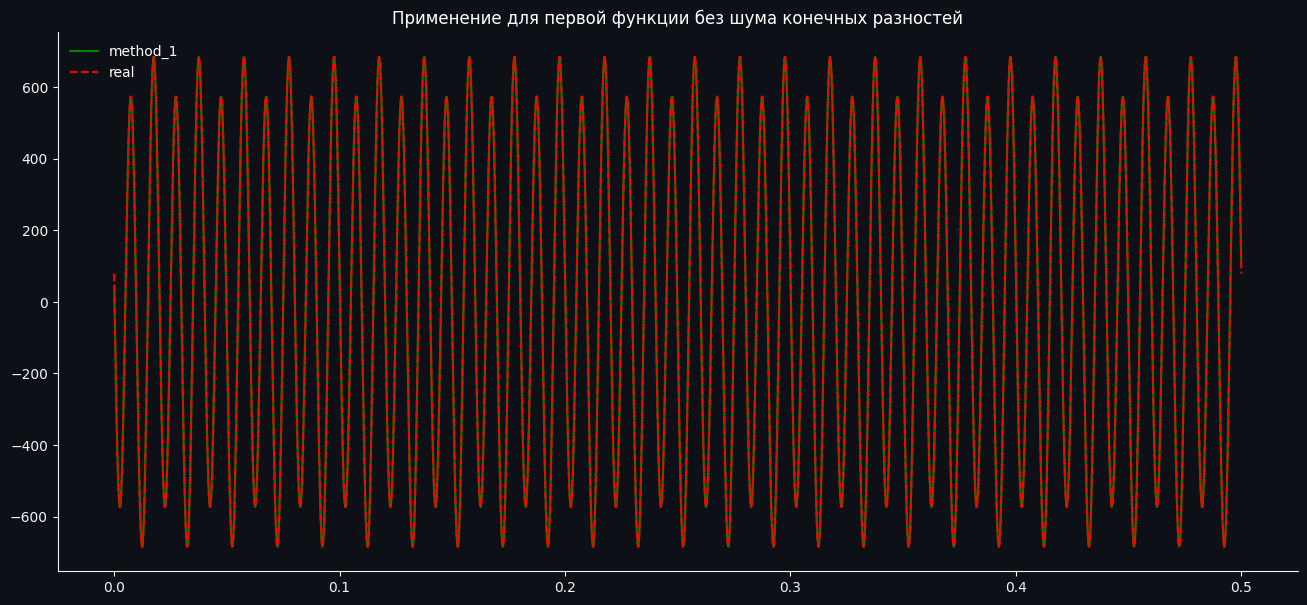

In [9]:
t_res, res = method_1(lambda t: f1(t), 1e-4, 0, 0.5)

plt.plot(t_res[1:-1], res[1:-1], label="method_1")
plt.plot(t_res, -np.sin(200*np.pi*t_res)*200*np.pi + 0.25*100*np.pi*np.cos(100*np.pi*t_res),'--', label="real")
plt.legend()
plt.title(f"Применение для первой функции без шума конечных разностей")

Text(0.5, 1.0, 'Применение для первой функции с шумом конечных разностей с $\\sigma$=1e-05')

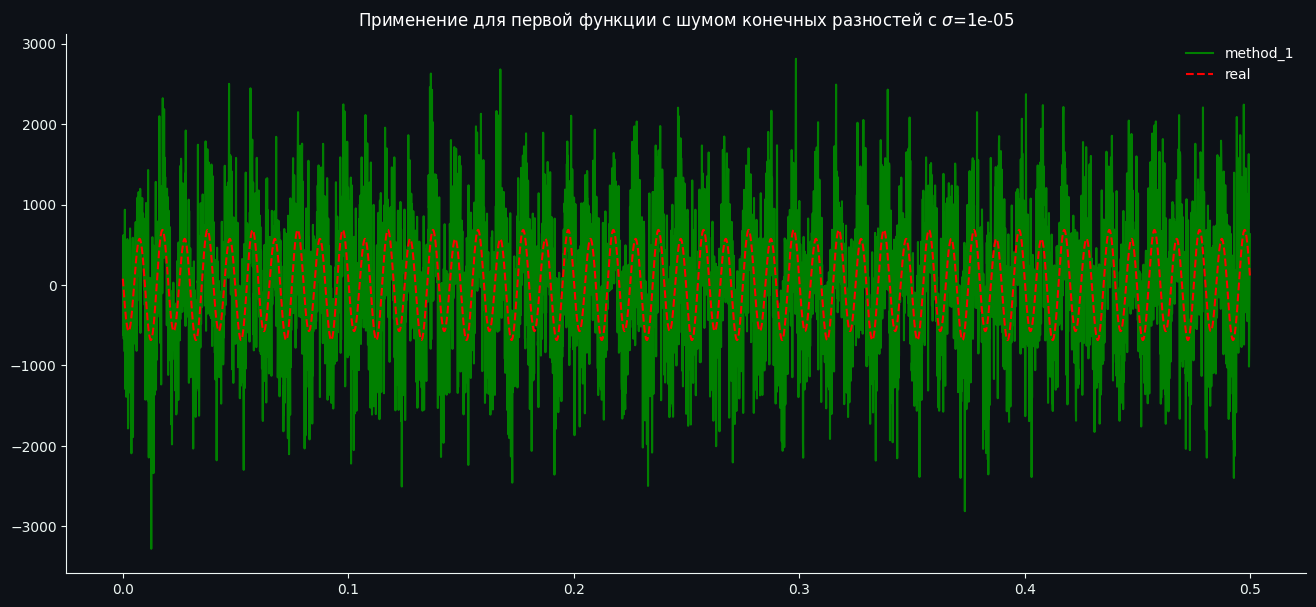

In [8]:
sigma = 1e-5
t_res, res = method_1(lambda t: f1(t) + gaussian_noise(t.shape, sigma=1e-1), 1e-4, 0, 0.5)

plt.plot(t_res[1:-1], res[1:-1], label="method_1")
plt.plot(t_res, -np.sin(200*np.pi*t_res)*200*np.pi + 0.25*100*np.pi*np.cos(100*np.pi*t_res),'--', label="real")
plt.legend()
plt.title(f"Применение для первой функции с шумом конечных разностей с $\sigma$={sigma}")

Text(0.5, 1.0, 'Применение для первой функции с шумом конечных разностей с $\\sigma$=0.1')

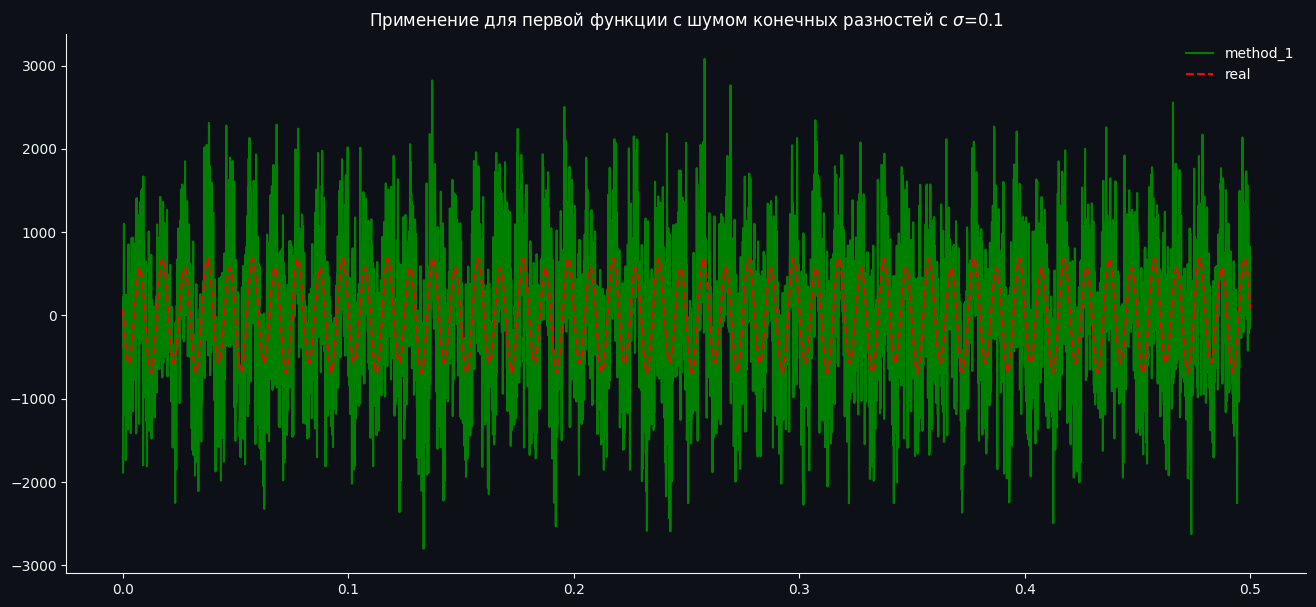

In [5]:
sigma = 1e-1
t_res, res = method_1(lambda t: f1(t) + gaussian_noise(t.shape, sigma=1e-1), 1e-4, 0, 0.5)

plt.plot(t_res[1:-1], res[1:-1], label="method_1")
plt.plot(t_res, -np.sin(200*np.pi*t_res)*200*np.pi + 0.25*100*np.pi*np.cos(100*np.pi*t_res),'--', label="real")
plt.legend()
plt.title(f"Применение для первой функции с шумом конечных разностей с $\sigma$={sigma}")

In [10]:
def rect(t: np.ndarray, a: float = 1) -> np.ndarray:
    """функция прямоугольника

    Args:
        t (np.ndarray): значения, для которых считать функцию
        a (float, optional): граница, после которой функцию будет давать ноль. Defaults to 1.

    Returns:
        np.ndarray: значение функции на t
    """

    res = np.ones_like(t)
    for i in range(len(res)):
        if abs(t[i]) > a:
            res[i] = 0.
    return res

def method_2(f, dt: float = 1e-5, t_min: float = 0., t_max: float = 0.001):
    t = np.linspace(t_min, t_max, int((t_max - t_min)/dt), endpoint=True)
    f_t = f(t)
    # делаем преобразование фурье 
    F = fft(f_t)
    # находим частоты, на которых посчитано F
    omega = 2*np.pi * fftfreq(f_t.shape[0], d = t[1] - t[0])
    # считаем для частот функцию прямоугольника (значение границ подобрано ана глаз)
    m = rect(omega, 2*np.pi*120)
    # производная в к-пространстве -- это домножение на 1j*omega, прямоугольник для того, чтоб погасить шум на бесконечности  
    F_res = 1j * omega * F  * m
    return t, np.real(ifft(F_res))

Text(0.5, 1.0, 'Применение для первой функции с шумом ($\\sigma$=0.5) метода с фурье')

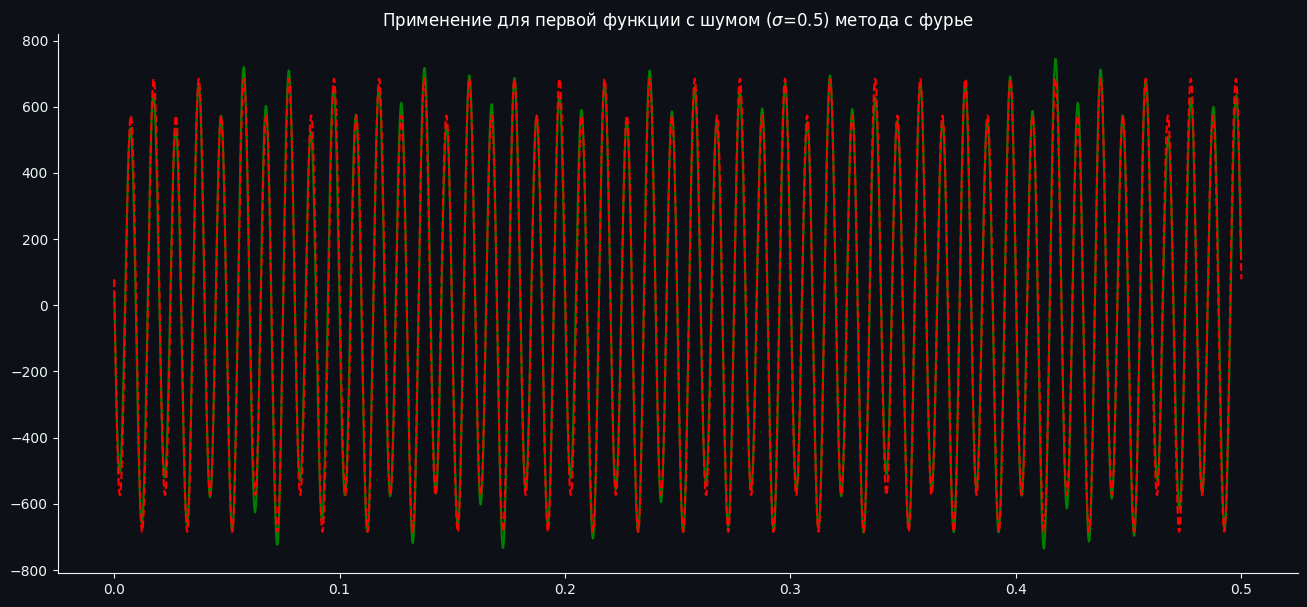

In [12]:
sigma = 5e-1

t_res, res = method_2(lambda t: f1(t) + gaussian_noise(t.shape, sigma=sigma), 1e-4, 0, 0.5)

plt.plot(t_res[1:-1], res[1:-1], label="method_2")
plt.plot(t_res, -np.sin(200*np.pi*t_res)*200*np.pi + 0.25*100*np.pi*np.cos(100*np.pi*t_res), '--', label="real")
plt.title(f"Применение для первой функции с шумом ($\sigma$={sigma}) метода с фурье")

Text(0.5, 1.0, 'Применение для второй функции с шумом ($\\sigma$=0.01) метода разностных схем')

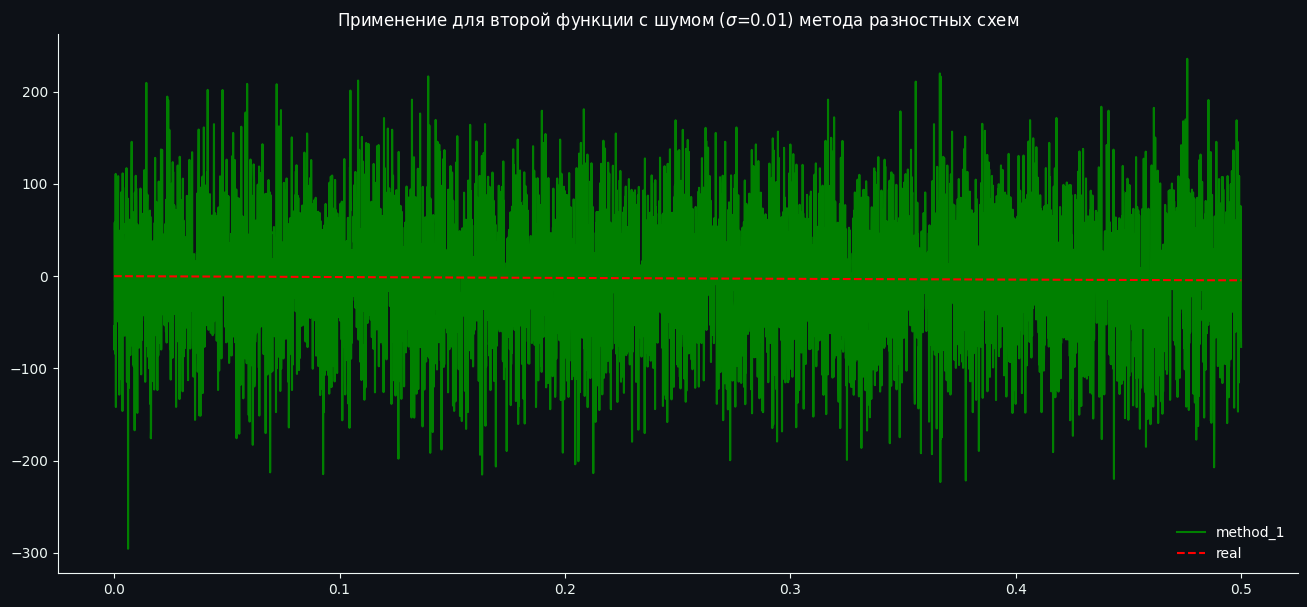

In [14]:
sigma = 1e-2
t_res, res = method_1(lambda t: f2(t) + gaussian_noise(t.shape, sigma=sigma), 1e-4, 0, 0.5)

plt.plot(t_res[1:-1], res[1:-1], label="method_1")
plt.plot(t_res, 4*t_res**3 - 10*t_res, '--', label='real')
plt.legend()
plt.title(f"Применение для второй функции с шумом ($\sigma$={sigma}) метода разностных схем")

Text(0.5, 1.0, 'Применение для второй функции с шумом ($\\sigma$=0.01) метода с фурье')

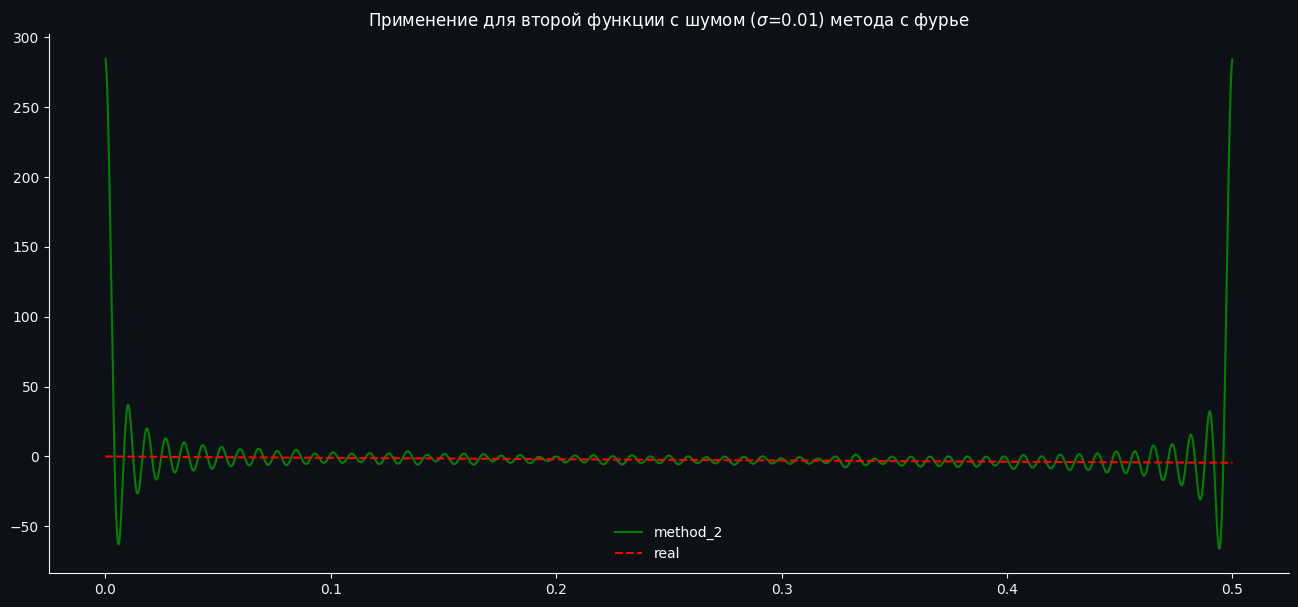

In [15]:
sigma = 1e-2

t_res, res = method_2(lambda t: f2(t) + gaussian_noise(t.shape, sigma=sigma), 1e-4, 0, 0.5)

plt.plot(t_res[1:-1], res[1:-1], label="method_2")
plt.plot(t_res, 4*t_res**3 - 10*t_res, '--', label='real')
plt.legend(labelcolor='w')
plt.title(f"Применение для второй функции с шумом ($\sigma$={sigma}) метода с фурье")

МНК

In [16]:
t = np.linspace(0, 0.5, 1000)
f = f2(t) + gaussian_noise(t.shape)
a = np.polyfit(t, f, deg=4)

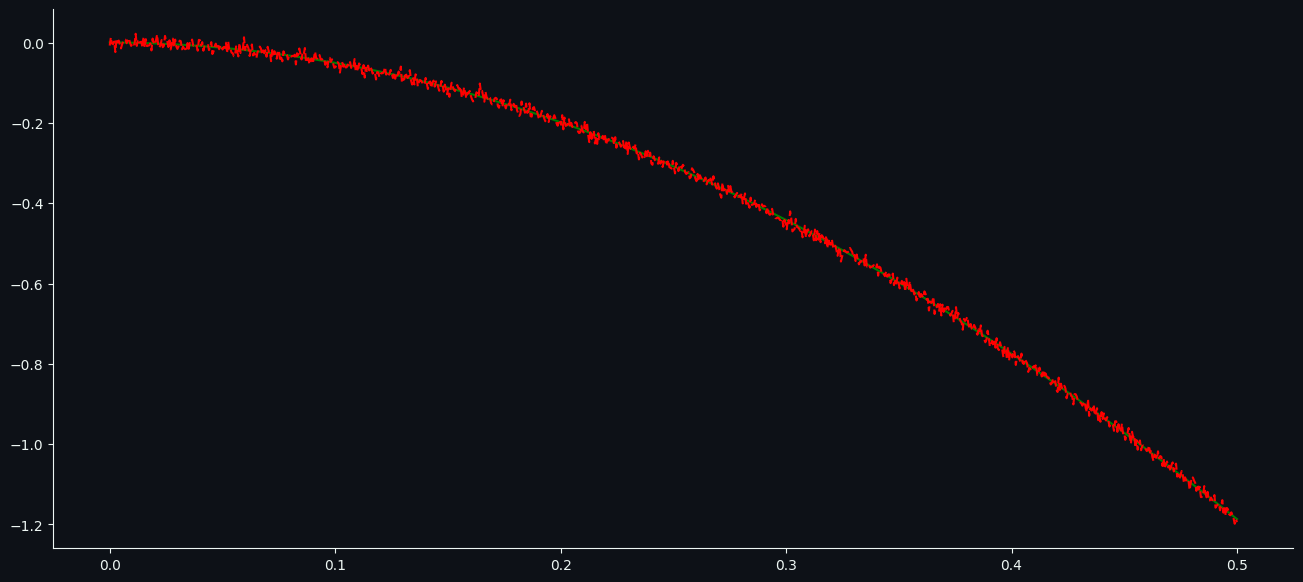

In [17]:
plt.plot(t, t**4*a[0] + t**3*a[1] + t**2*a[2]+t*a[3] + a[4])
plt.plot(t, f, '--')


Text(0.5, 1.0, 'Применение для второй функции с шумом ($\\sigma$=0.01) метода мнк')

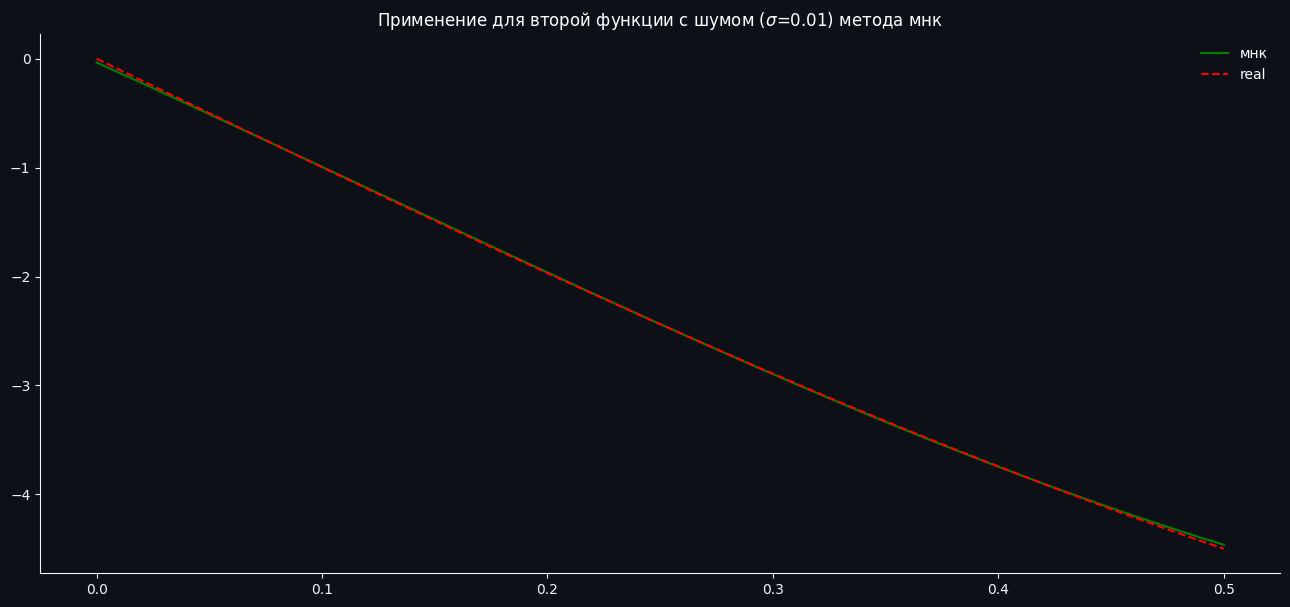

In [18]:
plt.plot(t, 4*t**3*a[0] + 3*t**2*a[1] + 2*t*a[2] + a[3], label='мнк')
plt.plot(t, 4*t**3 - 10*t, '--', label='real')
plt.legend()
plt.title(f"Применение для второй функции с шумом ($\sigma$={sigma}) метода мнк")
